In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import warnings 
warnings.simplefilter(action = "ignore")
from sklearn import preprocessing

In [2]:
columns = [ "age" , "job" ,"marital","education","default","housing","loan",
           "contact","month","day_of_week","duration","campaign","pdays","previous",
           "poutcome","emp.var.rate","cons.price.idx","cons.conf.idx","euribor3m","nr.employed"]

cat_columns = ["job","marital","education","default","housing","loan","contact","month","day_of_week","poutcome"]

cont_columns = ["age","duration","campaign","pdays","emp.var.rate","cons.price.idx",
               "cons.conf.idx" ,"euribor3m","nr.employed" ,"previous"]

missing_values = ["unknown","999"]

df = pd.read_csv('bank-full.csv', sep=';',na_values = missing_values)
df = df.reset_index(drop=True)
print('Shape of the data is: ',df.shape)
df.head()

Shape of the data is:  (41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Removing the duplicate values 

In [3]:
print("Number of duplicate values" , df[df.duplicated()].shape[0])
df = df.drop_duplicates().reset_index(drop=True)
df.shape

Number of duplicate values 12


(41176, 21)

## Categorical 

In [4]:
cat_df = df[cat_columns].copy()

cat_report = pd.DataFrame()

#setting data for each column
for colName in cat_df.columns:
    cat_row = {}
    #cat_row['Desc']=rel_cols_desc[rel_cols.index(colName)]
    cat_row['Count']=cat_df[colName].size
    cat_row['% of Missing']=np.round((cat_df[colName].isnull().sum()/cat_df[colName].size)*100,2)
    cat_row['Card']=cat_df[colName].unique().size
    cat_row['Mode']=cat_df[colName].mode()[0]
    cat_row['Mode Freq']=cat_df[colName].value_counts().max()
    cat_row['Mode %']=np.round((cat_df[colName].value_counts().max()/cat_df[colName].size)*100,2)
    cat_row['2nd Mode']=cat_df[colName].value_counts().keys()[1]
    cat_row['2nd Mode Freq']=cat_df[colName].value_counts()[1]
    cat_row['2nd Mode Perc']=np.round((cat_df[colName].value_counts()[1]/cat_df[colName].size)*100,2)
    cat_report = cat_report.append(cat_row, ignore_index = True)

print("Data Quality Report for Categorical Variables")
cat_report.index = cat_df.columns
cat_report = pd.DataFrame(cat_report).rename_axis('Feature', axis=1)
cat_report


Data Quality Report for Categorical Variables


Feature,Count,% of Missing,Card,Mode,Mode Freq,Mode %,2nd Mode,2nd Mode Freq,2nd Mode Perc
job,41176.0,0.80,12.0,admin.,10419.0,25.30,blue-collar,9253.0,22.47
marital,41176.0,0.19,4.0,married,24921.0,60.52,single,11564.0,28.08
education,41176.0,4.20,8.0,university.degree,12164.0,29.54,high.school,9512.0,23.10
default,41176.0,20.88,3.0,no,32577.0,79.12,yes,3.0,0.01
housing,41176.0,2.40,3.0,yes,21571.0,52.39,no,18615.0,45.21
loan,41176.0,2.40,3.0,no,33938.0,82.42,yes,6248.0,15.17
contact,41176.0,0.00,2.0,cellular,26135.0,63.47,telephone,15041.0,36.53
month,41176.0,0.00,10.0,may,13767.0,33.43,jul,7169.0,17.41
day_of_week,41176.0,0.00,5.0,thu,8618.0,20.93,mon,8512.0,20.67
poutcome,41176.0,0.00,3.0,nonexistent,35551.0,86.34,failure,4252.0,10.33


job


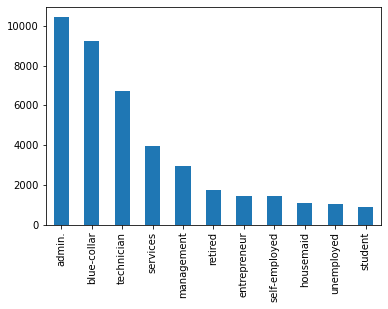

marital


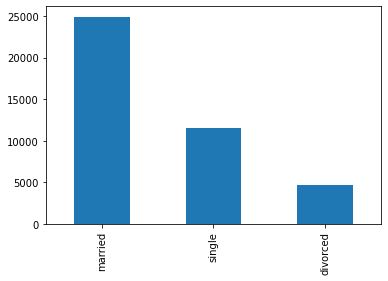

education


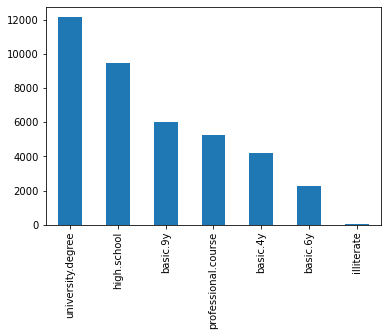

default


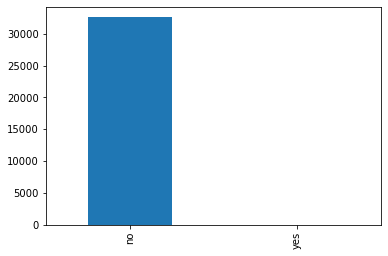

housing


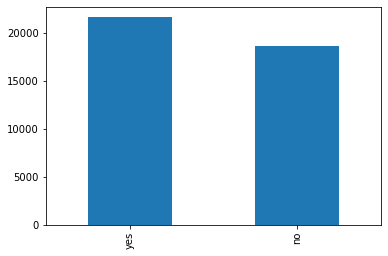

loan


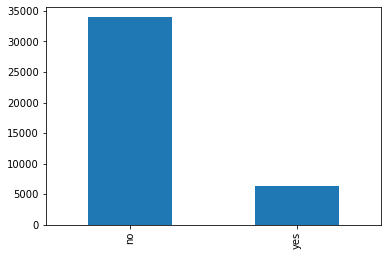

contact


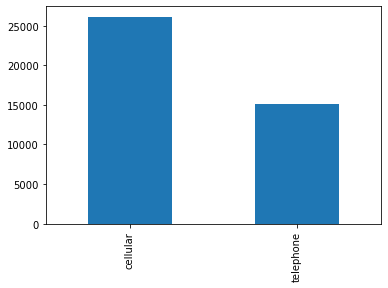

month


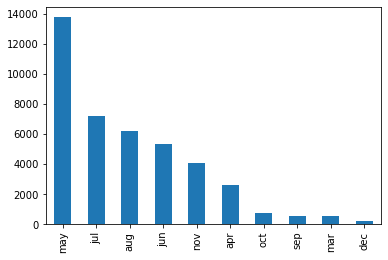

day_of_week


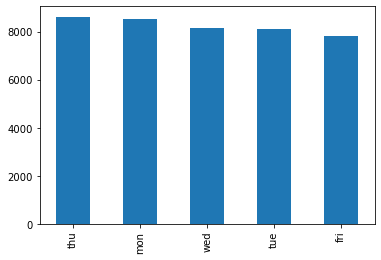

poutcome


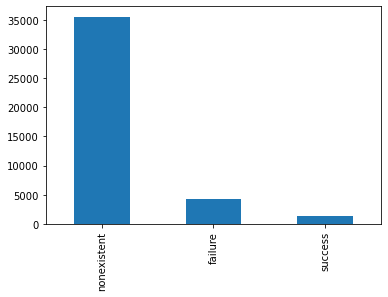

In [5]:
#plotting catagorical data 
for colName in cat_df.columns:
    print(colName)
    df[colName].value_counts().plot(kind='bar')
    plt.show()



# Continous

In [6]:
cont_df = df[cont_columns].copy()

cont_report = pd.DataFrame()

#setting data for each column
for colName in cont_df.columns:
    cont_row = {}
    #cont_row['Desc']=rel_cols_desc[rel_cols.index(colName)]
    cont_row['Count']=cont_df[colName].size
    cont_row['% of Missing']=np.round((cont_df[colName].isnull().sum()/cont_df[colName].size)*100,2)
    cont_row['Card.']=cont_df[colName].unique().size
    cont_row['Min.']=cont_df[colName].min()
    cont_row['Q1']=cont_df[colName].quantile(0.25)
    cont_row['Median']=cont_df[colName].quantile(0.50)
    cont_row['Q3']=cont_df[colName].quantile(0.75)
    cont_row['Max']=cont_df[colName].max()
    cont_row['Mean']=cont_df[colName].mean()
    cont_row['Std. Dev.']=cont_df[colName].std()
    cont_report = cont_report.append(cont_row, ignore_index = True)
    
print("Data Quality Report for Cont Variables")
cont_report.index = cont_df.columns
cont_report = pd.DataFrame(cont_report).rename_axis('Feature', axis=1)
cont_report

Data Quality Report for Cont Variables


Feature,Count,% of Missing,Card.,Min.,Q1,Median,Q3,Max,Mean,Std. Dev.
age,41176.0,0.00,78.0,17.000,32.000,38.000,47.000,98.000,40.023800,10.420680
duration,41176.0,0.00,1544.0,0.000,102.000,180.000,319.000,4918.000,258.279837,259.260227
campaign,41176.0,0.00,42.0,1.000,1.000,2.000,3.000,56.000,2.567879,2.770318
pdays,41176.0,96.32,27.0,0.000,3.000,6.000,7.000,27.000,6.014521,3.824906
emp.var.rate,41176.0,0.00,10.0,-3.400,-1.800,1.100,1.400,1.400,0.081922,1.570883
cons.price.idx,41176.0,0.00,26.0,92.201,93.075,93.749,93.994,94.767,93.575720,0.578839
cons.conf.idx,41176.0,0.00,26.0,-50.800,-42.700,-41.800,-36.400,-26.900,-40.502863,4.627860
euribor3m,41176.0,0.00,316.0,0.634,1.344,4.857,4.961,5.045,3.621293,1.734437
nr.employed,41176.0,0.00,11.0,4963.600,5099.100,5191.000,5228.100,5228.100,5167.034870,72.251364
previous,41176.0,0.00,8.0,0.000,0.000,0.000,0.000,7.000,0.173013,0.494964


array([<AxesSubplot:title={'center':'age'}>,
       <AxesSubplot:title={'center':'duration'}>,
       <AxesSubplot:title={'center':'campaign'}>,
       <AxesSubplot:title={'center':'pdays'}>,
       <AxesSubplot:title={'center':'emp.var.rate'}>,
       <AxesSubplot:title={'center':'cons.price.idx'}>,
       <AxesSubplot:title={'center':'cons.conf.idx'}>,
       <AxesSubplot:title={'center':'euribor3m'}>,
       <AxesSubplot:title={'center':'nr.employed'}>,
       <AxesSubplot:title={'center':'previous'}>], dtype=object)

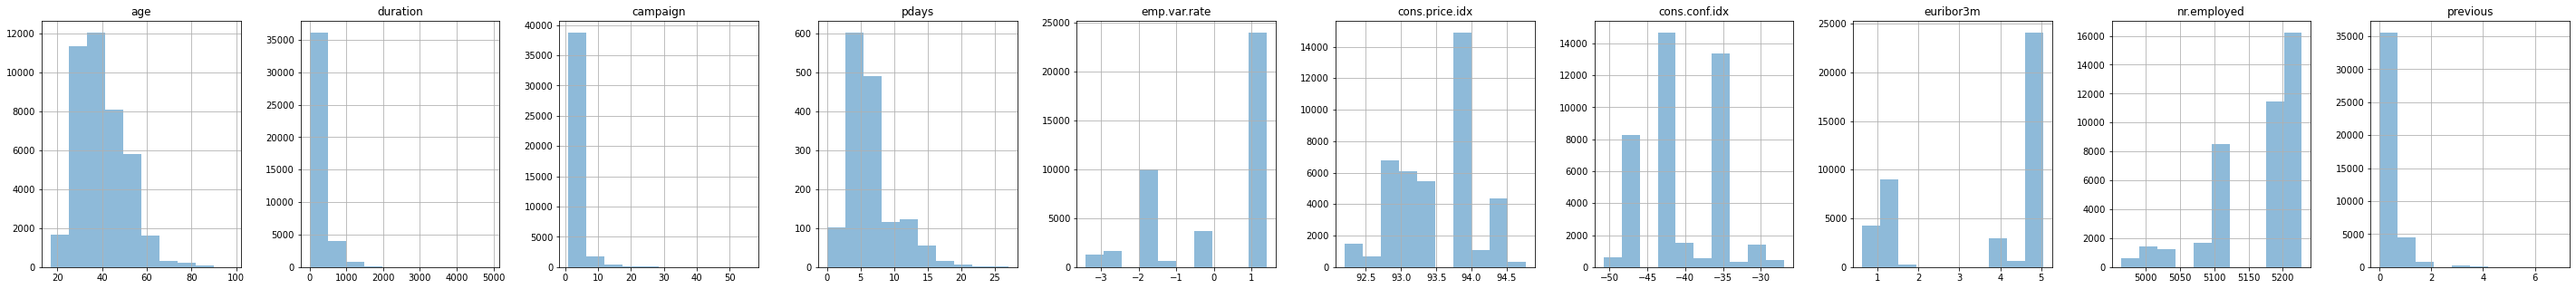

In [7]:
fig, ax = plt.subplots(1,10,figsize=(50,5)) 

cont_df.hist(bins=10, alpha=0.5, ax=ax) 

# Data Pre-processing 

## Categorical values
job - 0.8         
maritial - 0.19           
education - 4.20          
default	- 20.88	
housing	- 2.40	
loan -	2.40	

For < 2% will be removing.
others imputing with mode.

In [8]:
df.dropna(subset=['job','marital'], inplace=True)

for column in ['education', 'default', 'housing', 'loan']:
    df[column].fillna(df[column].mode()[0], inplace=True)

df.isnull().sum()

age                   0
job                   0
marital               0
education             0
default               0
housing               0
loan                  0
contact               0
month                 0
day_of_week           0
duration              2
campaign              0
pdays             39285
previous              0
poutcome              0
emp.var.rate          0
cons.price.idx        0
cons.conf.idx         0
euribor3m             0
nr.employed           0
y                     0
dtype: int64

## Continous values 
pdays - 96.32           
pday is the amount of days passed since the person was last contacted             
Since we need this feature , we will replace 999 to 0  

In [9]:
df['pdays'] = df['pdays'].fillna(0)
df['duration'] = df['duration'].fillna(0)

df = df.reset_index(drop=True)

df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,0.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,1,0.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,0.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,0.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,0.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40770,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,0.0,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
40771,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,0.0,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
40772,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,0.0,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
40773,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,0.0,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


## Transformations

one hot encoding


In [10]:
transformed_data = pd.get_dummies(df, columns=cat_columns)

transformed_data


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261.0,1,0.0,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
1,57,149.0,1,0.0,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
2,37,226.0,1,0.0,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
3,40,151.0,1,0.0,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
4,56,307.0,1,0.0,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40770,73,334.0,1,0.0,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0
40771,46,383.0,1,0.0,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0
40772,56,189.0,2,0.0,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0
40773,44,442.0,1,0.0,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0


## Normalization

In [11]:
scaler = preprocessing.MinMaxScaler()

target = transformed_data['y'].copy()

transformed_data.drop('y', axis=1, inplace=True)

d = scaler.fit_transform(transformed_data)

scaled_df = pd.DataFrame(d, columns=transformed_data.columns)

scaled_df['y'] = target

scaled_df.to_csv("processed_data.csv",index=False)

scaled_df


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y
0,0.481481,0.053070,0.000000,0.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,no
1,0.493827,0.030297,0.000000,0.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,no
2,0.246914,0.045954,0.000000,0.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,no
3,0.283951,0.030704,0.000000,0.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,no
4,0.481481,0.062424,0.000000,0.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40770,0.691358,0.067914,0.000000,0.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,yes
40771,0.358025,0.077877,0.000000,0.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,no
40772,0.481481,0.038430,0.018182,0.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,no
40773,0.333333,0.089874,0.000000,0.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,yes
